**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.spatial import distance
from scipy import stats
from sklearn.neighbors import KDTree

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self._k = n_neighbors
        self._algorithm = algorithm
        self._metric = metric

    def fit(self, X, y):
        if self._algorithm == 'brute':
            self._brute(X, y)
        if self._algorithm == 'kd_tree':
            self._kdtree(X, y)

    def _predict_brute(self, X):
        dists = distance.cdist(X, self._X, metric=self._metric)
        indices = np.argpartition(dists, self._k, axis=1)[:, :self._k]
        classes = self._y[indices]
        return stats.mode(classes, axis=1).mode.ravel()

    def _predict_kdtree(self, X):
        indices = self._tree.query(X, self._k, return_distance=False)
        classes = self._y[indices]
        return stats.mode(classes, axis=1).mode.ravel()

    def predict(self, X):
        if self._algorithm == 'brute':
            return self._predict_brute(X)
        if self._algorithm == 'kd_tree':
            return self._predict_kdtree(X)
    
    def _brute(self, X, y):
        self._X = X
        self._y = y

    def _kdtree(self, X, y):
        self._y = y
        self._tree = KDTree(X, leaf_size=20, metric=self._metric)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [ ]:
iris = datasets.load_iris()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [ ]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [ ]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [ ]:
%time clf.fit(X_train, y_train)

CPU times: user 1.23 ms, sys: 47 µs, total: 1.28 ms
Wall time: 983 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
%time my_clf.fit(X_train, y_train)

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 11.4 µs


In [ ]:
%time clf.predict(X_test)

CPU times: user 2.75 ms, sys: 0 ns, total: 2.75 ms
Wall time: 3.71 ms


array([0, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0])

In [ ]:
%time my_clf.predict(X_test)

CPU times: user 2.15 ms, sys: 29 µs, total: 2.18 ms
Wall time: 1.97 ms


array([0, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [ ]:
%time clf.fit(X_train, y_train)

CPU times: user 619 µs, sys: 923 µs, total: 1.54 ms
Wall time: 4.86 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
%time my_clf.fit(X_train, y_train)

CPU times: user 245 µs, sys: 52 µs, total: 297 µs
Wall time: 232 µs


In [ ]:
%time clf.predict(X_test)

CPU times: user 2.75 ms, sys: 0 ns, total: 2.75 ms
Wall time: 2.79 ms


array([2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0])

In [ ]:
%time my_clf.predict(X_test)

CPU times: user 2.23 ms, sys: 0 ns, total: 2.23 ms
Wall time: 2.13 ms


array([2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0])

In [ ]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [36]:
newsgroups = fetch_20newsgroups(subset='train', remove=['headers','footers', 'quotes'])

In [37]:
data = newsgroups['data']
target = newsgroups['target']
len(data)

11314

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(data).toarray()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(11314, 10000)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn.model_selection import KFold

In [23]:
kf = KFold(n_splits=3, shuffle=True)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10. \

In [14]:
def best_k(X, y, metric='euclidean'):
  val_scores = []
  for i in range(1, 11):
    print("Testing", i, "neighbors", sep=' ')
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute',
                                    metric=metric)
    scores = []
    for train, test in kf.split(X):
      X_train, X_test = X[train], X[test]
      y_train, y_test = target[train], target[test]
      my_clf.fit(X_train, y_train)
      y_pred = my_clf.predict(X_test)
      scores.append(accuracy_score(y_test, y_pred))
    val_scores.append(np.mean(scores))
  plt.plot(np.arange(1, 11), val_scores)
  best = np.asarray(val_scores).argmax()
  return (best + 1, val_scores[best])

Тут я поправила границы в методе выше и рассмотрела от 1 до 30 соседей.

Testing 1 neighbors
Testing 2 neighbors
Testing 3 neighbors
Testing 4 neighbors
Testing 5 neighbors
Testing 6 neighbors
Testing 7 neighbors
Testing 8 neighbors
Testing 9 neighbors
Testing 10 neighbors
Testing 11 neighbors
Testing 12 neighbors
Testing 13 neighbors
Testing 14 neighbors
Testing 15 neighbors
Testing 16 neighbors
Testing 17 neighbors
Testing 18 neighbors
Testing 19 neighbors
Testing 20 neighbors
Testing 21 neighbors
Testing 22 neighbors
Testing 23 neighbors
Testing 24 neighbors
Testing 25 neighbors
Testing 26 neighbors
Testing 27 neighbors
Testing 28 neighbors
Testing 29 neighbors
Testing 30 neighbors
CPU times: user 7h 4min 10s, sys: 3.27 s, total: 7h 4min 13s
Wall time: 7h 4min 20s


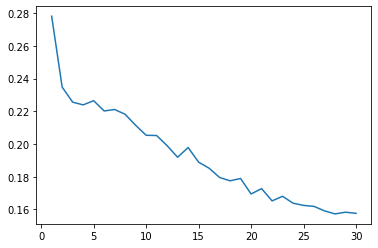

In [12]:
%%time

neighbors, best_score = best_k(X, target)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

1. Косинусная метрика от 1 до 10 соседей (видно, что есть куда расти)

Testing 1 neighbors
Testing 2 neighbors
Testing 3 neighbors
Testing 4 neighbors
Testing 5 neighbors
Testing 6 neighbors
Testing 7 neighbors
Testing 8 neighbors
Testing 9 neighbors
Testing 10 neighbors
10 0.4803781749034674
CPU times: user 2h 19min 8s, sys: 1.41 s, total: 2h 19min 10s
Wall time: 2h 19min 14s


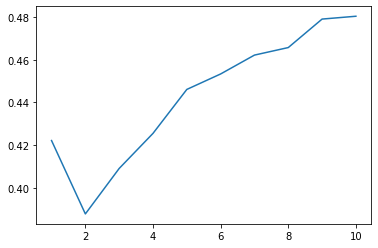

In [11]:
%%time

neighbors, best_score = best_k(X, target, metric='cosine')

print(neighbors, best_score)

от 11 до 20 соседей (снова есть потенциал)

Testing 11 neighbors
Testing 12 neighbors
Testing 13 neighbors
Testing 14 neighbors
Testing 15 neighbors
Testing 16 neighbors
Testing 17 neighbors
Testing 18 neighbors
Testing 19 neighbors
Testing 20 neighbors
20 0.5111356842356773
CPU times: user 2h 20min 16s, sys: 825 ms, total: 2h 20min 17s
Wall time: 2h 20min 20s


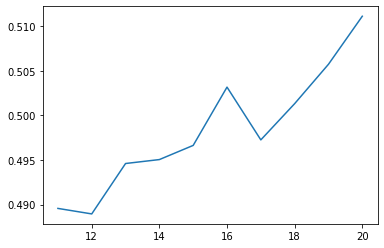

In [13]:
%%time

neighbors, best_score = best_k(X, target, metric='cosine')

print(neighbors, best_score)

от 21 до 30 соседей (в принципе граница точности видна, но...)

Testing 21 neighbors
Testing 22 neighbors
Testing 23 neighbors
Testing 24 neighbors
Testing 25 neighbors
Testing 26 neighbors
Testing 27 neighbors
Testing 28 neighbors
Testing 29 neighbors
Testing 30 neighbors
26 0.5162630215766376
CPU times: user 2h 13min 11s, sys: 1.41 s, total: 2h 13min 12s
Wall time: 2h 13min 17s


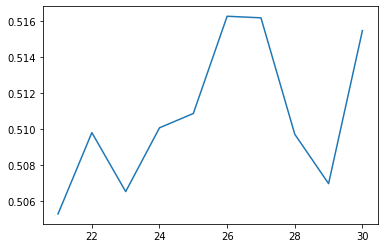

In [15]:
%%time

neighbors, best_score = best_k(X, target, metric='cosine')

print(neighbors, best_score)

Я запускала параллельно в другом ноутбуке, поэтому ниже скрин вывода.\
В общем, для косинусной метрики лучшее - 37 соседей.

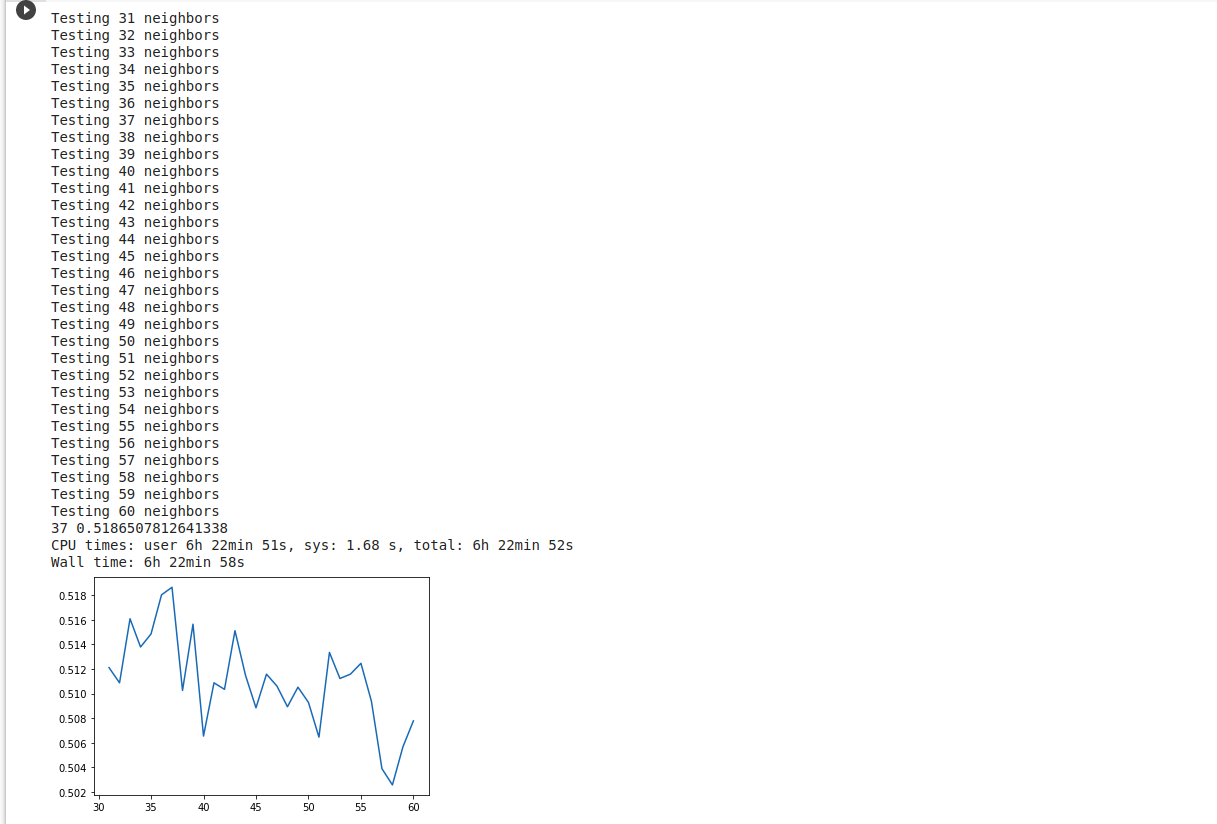

2. TfIdf векторизация + косинусная метрика

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(data).toarray()
X = scaler.fit_transform(X)

Далее скрины запусков и выводов, потому что делала параллельно.\
Это наивная попытка №1 для 1-10 соседей.

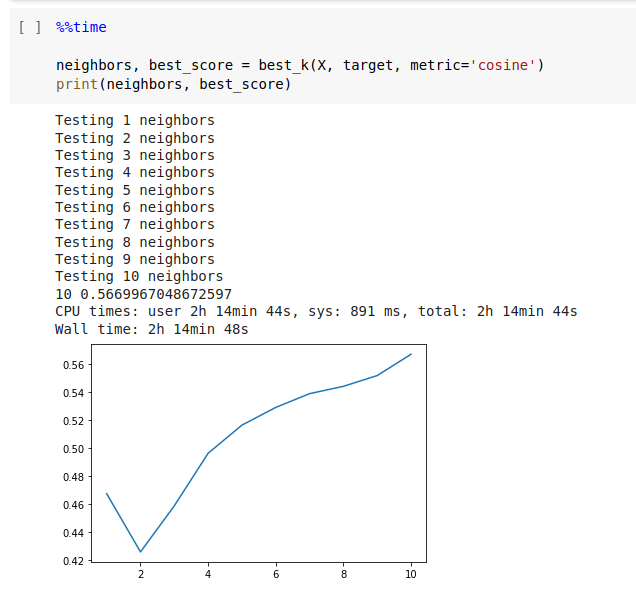

от 11 до 20 соседей

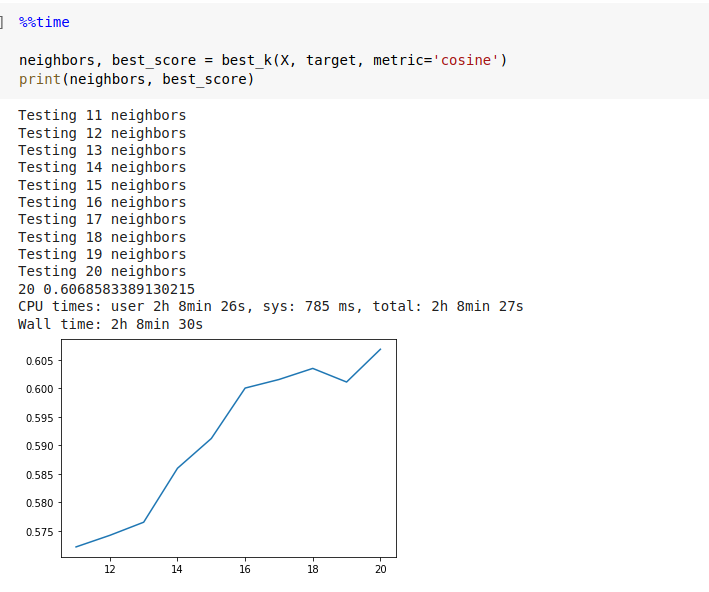

от 21 до 30 соседей

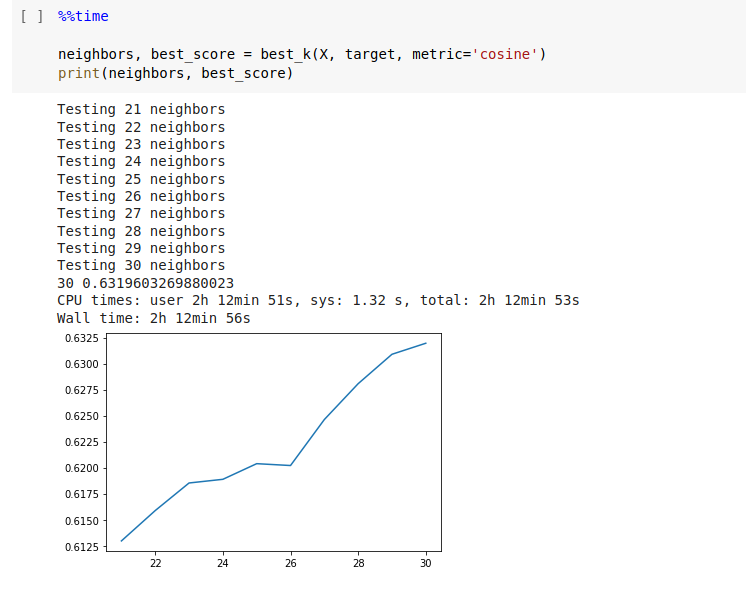

и от 31 до 60)))

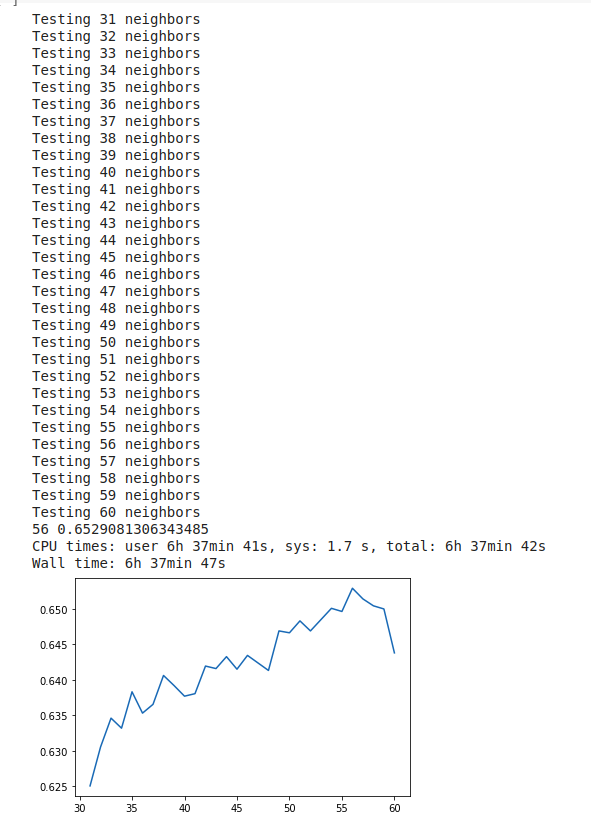

Лучший результат дала Tfidf векторизация + косинусная метрика на 56 соседях.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [39]:
newsgroups = fetch_20newsgroups(subset='test', remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [40]:
tdata = newsgroups['data']
ttarget = newsgroups['target']

In [59]:
vectorizer = TfidfVectorizer(max_features=10000)
X_test = vectorizer.fit_transform(tdata).toarray()

In [60]:
%%time
my_clf = MyKNeighborsClassifier(56, algorithm='brute', metric='cosine')
my_clf.fit(X, target)

CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 23.4 µs


In [61]:
%%time 
pred = my_clf.predict(X_test)

CPU times: user 13min 53s, sys: 47.3 ms, total: 13min 53s
Wall time: 13min 54s


In [62]:
accuracy_score(ttarget, pred)

0.05762081784386617

knn здорового человека

In [63]:
clf = KNeighborsClassifier(56, algorithm='brute', metric='cosine')

In [64]:
clf.fit(X, target)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=56, p=2,
                     weights='uniform')

In [65]:
%%time
pred_knn = clf.predict(X_test)

CPU times: user 1min 33s, sys: 232 ms, total: 1min 34s
Wall time: 48.8 s


In [66]:
abs(accuracy_score(ttarget, pred) - accuracy_score(ttarget, pred_knn))

0.0

**Комментарии**\
Точность на тестовой выборке сильно меньше, чем на валидации. Однако она совпадает с точностью библиотечного knn. Наверное, это связано с тем, что тренировочная выборка плохо описывает тестовую.
